<b> This Jupyter notebook will serve as my MVP for the Classification regression module.</b> 

<b> This jupyter notebook contains a baseline random forest model for my asteroid data. The next step will be to dive deeper into the confusion matrix. I will also explore the feature importance chart to evaluate how the model is already performing so well without any feature engineering. The cross validaiton scores are all roughly 0.999 </b>

<b> Asteroid's are constantly being monitored in our solar system. This model would create faster automation of data labeling for asteroids. Developing a model to classify each asteroid into the correct cluster has scientific value.  Many times there are features missing from an asteroid observation due to technical limitations. We are interested in creating a model with the fewest number of features in order to classify each asteroid in the correct cluster.</b>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

sns.set(context='notebook', style='whitegrid')

np.set_printoptions(suppress=True) # Suppress scientific notation where possible

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import StratifiedKFold

pd.options.display.max_columns = None
import pprint
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper



In [4]:
# Read in my csv 
Asteroid_Data = pd.read_csv('Asteroid_Data_Cleaned_136889.csv')

In [6]:
# Drop the Unnamed: 0 column
# Asteroid_Data.drop(['Unnamed: 0'], axis = 1, inplace = True)

<B> BELOW IS THE RANDOM FOREST MODEL WITH THE STRATIFIED DATA </B>

In [4]:
# Drop the binary class 

In [5]:
# Drop the smaller asteroid classes 

In [7]:
# Identify my X
# Put in my features that I want 
# My X is my dataframe with the classifying Y target column removed
X = Asteroid_Data.drop(['class','Orbital_Period_Years'], axis=1)

In [8]:
# Specify my Y 
y = Asteroid_Data['class']

In [9]:
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= y)

In [10]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [11]:
# rfc_cv_score = cross_val_score[rfc, X, y, cv=10, scoring=’roc_auc’]
scores = cross_val_score(rfc, X=X_train, y=y_train, cv= StratifiedKFold(10) , n_jobs=-1)

/Users/rachelbryn/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [12]:
print('Cross Validation accuracy scores: %s' % scores)
 
print('Cross Validation accuracy: %.4f +/- %.4f' % (np.mean(scores),np.std(scores)))

Cross Validation accuracy scores: [0.99954346 0.99981737 0.99990868 0.99963474 0.99990868 0.99981737
 0.99972605 1.         0.99972605 1.        ]
Cross Validation accuracy: 0.9998 +/- 0.0001


<b> Random Tree cross validation accuracy scores with 10 folds: </b>

Cross Validation accuracy scores: [0.99954346 0.99990868 0.99990868 0.99972605 0.99990868 0.99981737
 0.99981737 1.         0.99972605 0.99990868]
Cross Validation accuracy: 0.9998 +/- 0.0001

<b> Random Tree Cross validation accuracy scores with 8 folds</b>: 

Cross Validation accuracy scores: [0.99970779 0.99978085 0.99963474 0.9998539  0.9998539  0.99992695
 0.99978085 1.        ]
Cross Validation accuracy: 0.9998 +/- 0.0001

<b> Cross validation accuracy scores with 5 folds </b>: 

Cross Validation accuracy scores: [0.99968041 0.99977171 0.99995434 0.99995434 0.99981737]
Cross Validation accuracy: 0.9998 +/- 0.0001

<B> Random forests have many many degrees of freedom, so it is relatively easy for them to get to the point that they have near 100% accuracy in-sample. This is merely an overfitting problem. Likely you want to use some tuning parameters to reduce the model complexity some (reduce tree depth, raise minimal node size, etc). Some degree of cross-validation would help you here. Alternatively, it still has the best oob performance...

In [37]:
### Create a confusion matrix 
preds = rfc.predict(X_test)

TypeError: score() missing 1 required positional argument: 'y'

In [39]:
rfc.score(X_test, y_test)

0.9998904229673461

In [14]:
### Create a confusion matrix for the random forest model
log_matrix = confusion_matrix(y_test, preds)
log_matrix
# All true positives are along the diag. 3 total mis predictions, based on the confusion matrix. The model is doing a good 
# job predicting the majority class (25149).

array([[   53,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,    97,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     1,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,    19,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     9,     0,     0,     0,     0,
            0,     1],
       [    0,     0,     0,     0,     0,   113,     0,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0, 25149,     0,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     0,    67,     0,
            0,     0],
       [    1,     0,     0,     0,     0,     0,     0,     0,  1490,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
          375,     0],
       [    0,     0,     0,     0,     0,     0,     0,    

<AxesSubplot:>

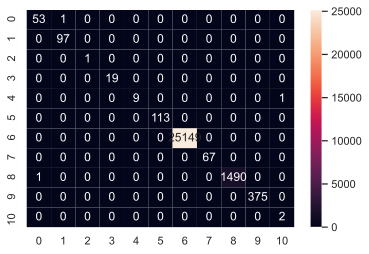

In [21]:
sns.heatmap(log_matrix, annot = True, fmt='d') 

In [14]:
### Get feature importance (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) 

<B> FEATURE IMPORTANCE WITH A FOREST OF TREES </B>

<b> Feature importance based on mean decrease in impurity </b>

In [15]:
import time
import numpy as np

import matplotlib.pyplot as plt

start_time = time.time()
importances = rfc.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rfc.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.027 seconds


In [16]:
feature_names = [f'feature {i}' for i in range(X.shape[1])]

<AxesSubplot:>

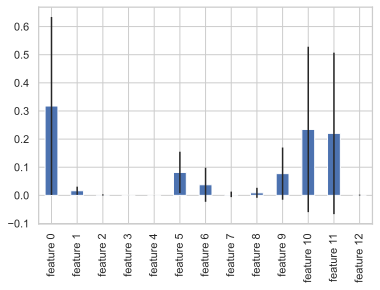

In [17]:
# get importance
importance = rfc.feature_importances_
forest_importances = pd.Series(importance, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax = ax)
# To add std. deviation bars: forest_importances.plot.bar(yerr=std, ax = ax)

<AxesSubplot:>

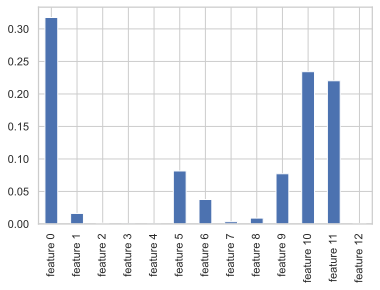

In [18]:
# get importance
importance = rfc.feature_importances_
forest_importances = pd.Series(importance, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(ax = ax)
# To add std. deviation bars: forest_importances.plot.bar(yerr=std, ax = ax)

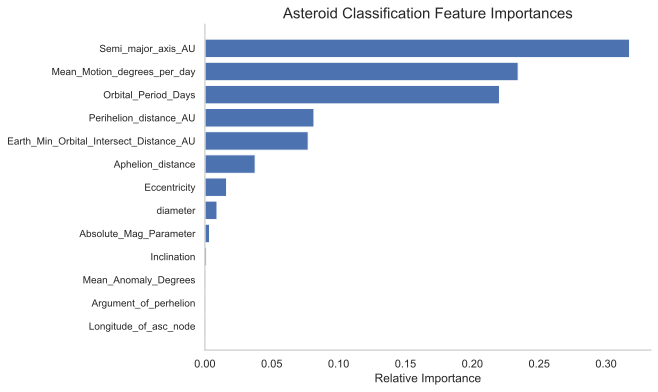

In [32]:
# plt.fig_size([10,10])
#sns.set_style(style = 'whitegrid')
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize = (8, 6), facecolor = 'w')
plt.title('Asteroid Classification Feature Importances', size = 15)
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [features[i] for i in indices], size = 10)
plt.xlabel('Relative Importance', size = 12)
plt.grid(False)
sns.despine()
plt.savefig('feature_importance.svg', bbox_inches = 'tight')

Mean Motion Degrees per day:
Semi major axis (AU):
Orbital Period (days):
Orbital Period (years):
Perihelion Distance (AU):
Earth Minimum Orbital Intersect Distance (AU):
Aphelion Distance:
Eccentricity:
Diameter:
Absolute Magnitude Parameter:
Inclinitation: 

In [20]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.18713
Feature: 1, Score: 0.01583
Feature: 2, Score: 0.00108
Feature: 3, Score: 0.00030
Feature: 4, Score: 0.00030
Feature: 5, Score: 0.06539
Feature: 6, Score: 0.04702
Feature: 7, Score: 0.23393
Feature: 8, Score: 0.00391
Feature: 9, Score: 0.00912
Feature: 10, Score: 0.05939
Feature: 11, Score: 0.18746
Feature: 12, Score: 0.18803
Feature: 13, Score: 0.00110


In [21]:
# Label the bar chart to see which features are important

<b>Feature importance based on feature permutation</b>

In [22]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rfc, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 82.089 seconds


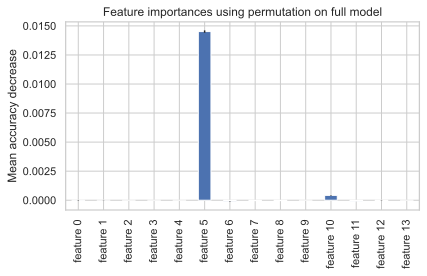

In [23]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()